In [1]:
from stdp_assemblies import *

In [2]:
def wrapper(N, w):
    if 1 - ((N - 1) * w) < 0:
        return -1e6
    if 1 - ((N - 1) * w) < 0.001:
        return -1
    else:
        return delta_W_th(N, w)

In [3]:
w_max = 0.1
N_max = 82
points_N = 2401
points_w = 2001
w_ticklabels = np.arange(0.0, w_max + 0.01, 0.02)
w_ticks = (w_ticklabels) * (points_w - 1) / w_max
N_ticklabels = np.arange(10, N_max + 1, 10)
N_ticks = (N_ticklabels - 2) * (points_N - 1) / (N_max - 2)

In [4]:
grid = [
    [wrapper(N, w) for N in np.linspace(2, 80, points_N)]
    for w in np.linspace(0, 0.1, points_w)
]

Text(0, 0.5, '$\\hat w$')

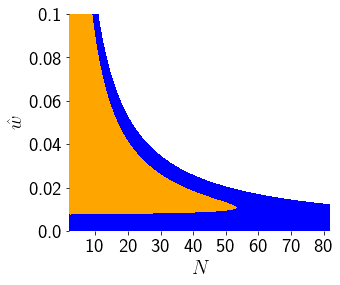

In [5]:
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib as mpl
mpl.rcParams["text.usetex"] = True
mpl.rcParams.update({"font.size": 20})

cmap = colors.ListedColormap(["white", "blue", "orange"])
bounds = [-1e7, -2000, 0, 3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
im = ax.imshow(grid, cmap=cmap, norm=norm, origin="lower")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks(N_ticks)
ax.set_xticklabels(N_ticklabels)
ax.set_xlabel("$N$")
ax.set_yticks(w_ticks)
ax.set_yticklabels(w_ticklabels)
ax.set_ylabel("$\hat w$")
fig.savefig("results/phaseplot/phaseplot.png", dpi=500)
